In [314]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import re
from datetime import datetime


%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None

In [315]:
ls

data/  forexeda.ipynb  getdata/  models/  README.md  resources/


In [381]:
df = pd.read_pickle('data/EUR_USD_M1')
df.set_index('time', inplace=True)
df.shape

(4644072, 6)

In [382]:
df.head()

,volume,close,high,low,open,complete
time,,,,,,
2005-01-02 18:29:00,1,1.3560,1.3560,1.3560,1.3560,True
2005-01-02 18:38:00,1,1.3560,1.3560,1.3560,1.3560,True
2005-01-02 18:51:00,1,1.3567,1.3567,1.3567,1.3567,True
2005-01-02 18:52:00,1,1.3565,1.3565,1.3565,1.3565,True
2005-01-02 18:55:00,1,1.3568,1.3568,1.3568,1.3568,True


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4644072 entries, 2005-01-02 18:29:00 to 2017-09-05 03:34:00
Data columns (total 6 columns):
volume      int64
close       float64
high        float64
low         float64
open        float64
complete    bool
dtypes: bool(1), float64(4), int64(1)
memory usage: 217.0 MB


In [384]:
def plot_price(df, figtitle):
    fig, ax = plt.subplots(figsize=(25,10))
    ax.plot(df['close'])
    ax.set_title(figtitle)    

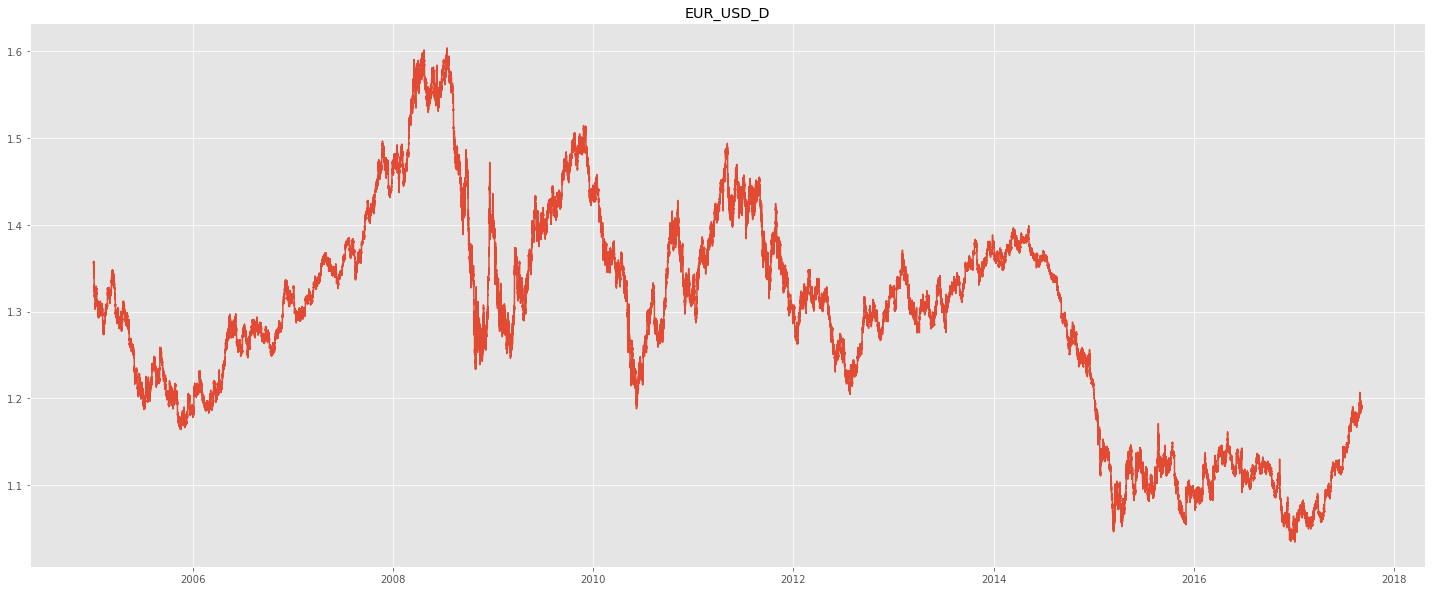

In [385]:
plot_price(df, 'EUR_USD_D')

# Add Target for Classification (Up / Down)

target of i day is the np.sign((open i+d) - (open i))

Exponentially smooth data before calculating features?

In [413]:
df = pd.read_pickle('data/EUR_USD_M1')
df.set_index('time', inplace=True)
df.shape
df.head()

,volume,close,high,low,open,complete
time,,,,,,
2005-01-02 18:29:00,1,1.3560,1.3560,1.3560,1.3560,True
2005-01-02 18:38:00,1,1.3560,1.3560,1.3560,1.3560,True
2005-01-02 18:51:00,1,1.3567,1.3567,1.3567,1.3567,True
2005-01-02 18:52:00,1,1.3565,1.3565,1.3565,1.3565,True
2005-01-02 18:55:00,1,1.3568,1.3568,1.3568,1.3568,True


In [414]:
def up_down(row):
    if row >= 0:
        return 1
    else:
        return 0

In [415]:
#df['actual_up_down'] = np.sign(df['open']-df['open'].shift(1))
df['log_returns_1'] = np.log(df['close'].shift(-1) / df['close'])
df['ari_returns_1'] = (df['close'].shift(-1) / df['close']) - 1
df['target_label_direction_1'] = df['log_returns_1'].apply(up_down)

In [416]:
df.head()

,volume,close,high,low,open,complete,log_returns_1,ari_returns_1,target_label_direction_1
time,,,,,,,,,
2005-01-02 18:29:00,1,1.3560,1.3560,1.3560,1.3560,True,0.000000,0.000000,1
2005-01-02 18:38:00,1,1.3560,1.3560,1.3560,1.3560,True,0.000516,0.000516,1
2005-01-02 18:51:00,1,1.3567,1.3567,1.3567,1.3567,True,-0.000147,-0.000147,0
2005-01-02 18:52:00,1,1.3565,1.3565,1.3565,1.3565,True,0.000221,0.000221,1
2005-01-02 18:55:00,1,1.3568,1.3568,1.3568,1.3568,True,-0.000074,-0.000074,0


In [417]:
df.tail()

,volume,close,high,low,open,complete,log_returns_1,ari_returns_1,target_label_direction_1
time,,,,,,,,,
2017-09-05 03:30:00,23,1.19082,1.19088,1.19076,1.19088,True,-0.000067,-0.000067,0
2017-09-05 03:31:00,9,1.19074,1.19087,1.19074,1.19084,True,-0.000025,-0.000025,0
2017-09-05 03:32:00,47,1.19071,1.19082,1.19068,1.19068,True,0.000042,0.000042,1
2017-09-05 03:33:00,53,1.19076,1.19080,1.19071,1.19071,True,0.000034,0.000034,1
2017-09-05 03:34:00,42,1.19080,1.19082,1.19071,1.19082,True,NaN,NaN,0


In [418]:
np.log(1.34650/1.35525)

-0.006477305888793995

In [419]:
df['log_returns_3'] = np.log(df['close'].shift(-3) / df['close'])
df['ari_returns_3'] = (df['close'].shift(-3) / df['close']) - 1
df['target_label_direction_3'] = df['log_returns_3'].apply(up_down)

In [420]:
df.head()

,volume,close,high,low,open,complete,log_returns_1,ari_returns_1,target_label_direction_1,log_returns_3,ari_returns_3,target_label_direction_3
time,,,,,,,,,,,,
2005-01-02 18:29:00,1,1.3560,1.3560,1.3560,1.3560,True,0.000000,0.000000,1,0.000369,0.000369,1
2005-01-02 18:38:00,1,1.3560,1.3560,1.3560,1.3560,True,0.000516,0.000516,1,0.000590,0.000590,1
2005-01-02 18:51:00,1,1.3567,1.3567,1.3567,1.3567,True,-0.000147,-0.000147,0,0.000000,0.000000,1
2005-01-02 18:52:00,1,1.3565,1.3565,1.3565,1.3565,True,0.000221,0.000221,1,0.000295,0.000295,1
2005-01-02 18:55:00,1,1.3568,1.3568,1.3568,1.3568,True,-0.000074,-0.000074,0,0.000074,0.000074,1


In [421]:
np.log(	1.32790/1.35600)

-0.020940442504059065

# Add Features pandas

In [422]:
df['20d_ma'] = df['close'].rolling(window=20).mean()
df['50d_ma'] = df['close'].rolling(window=50).mean()
df['Bol_upper'] = df['close'].rolling(window=20).mean() + 2* df['close'].rolling(window=20, min_periods=20).std()
df['Bol_lower'] = df['close'].rolling(window=20).mean() - 2* df['close'].rolling(window=20, min_periods=20).std()
df['Bol_BW'] = ((df['Bol_upper'] - df['Bol_lower'])/df['20d_ma'])*100
df['Bol_BW_200MA'] = df['Bol_BW'].rolling(window=50).mean()
df['20d_exma'] = df['close'].ewm(span=20).mean()
df['50d_exma'] = df['close'].ewm(span=50).mean()

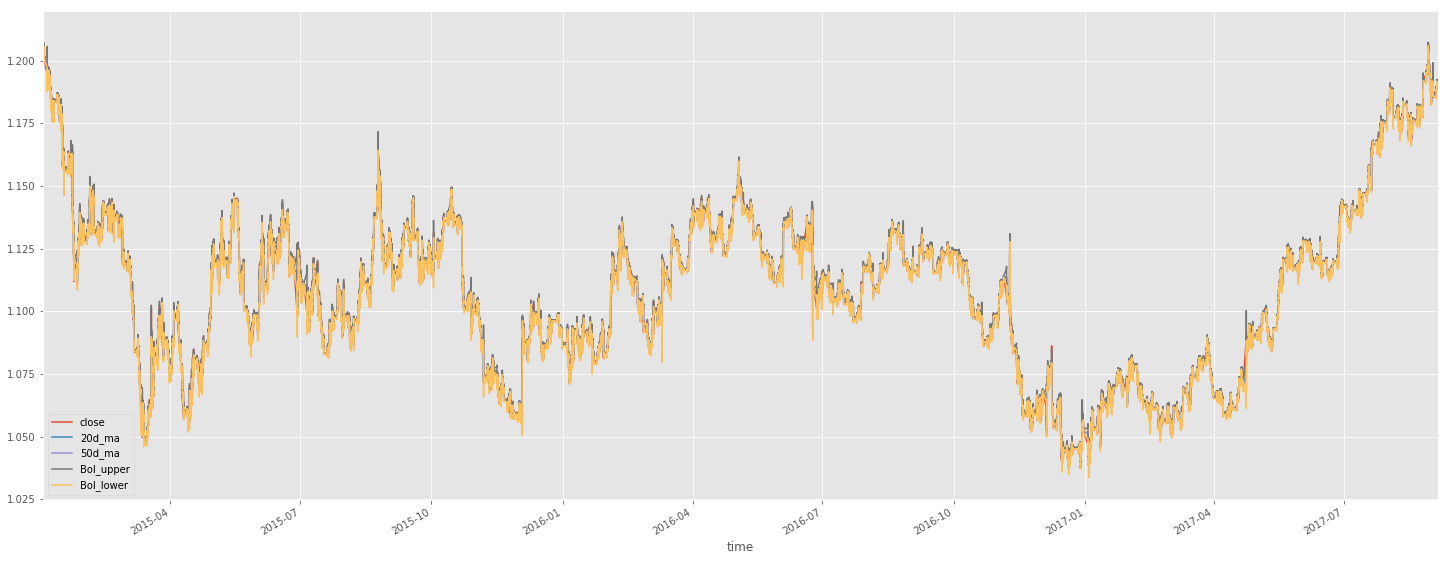

In [423]:
df[datetime(2015,1,1):].plot(y=['close','20d_ma','50d_ma','Bol_upper','Bol_lower'], figsize=(25,10))

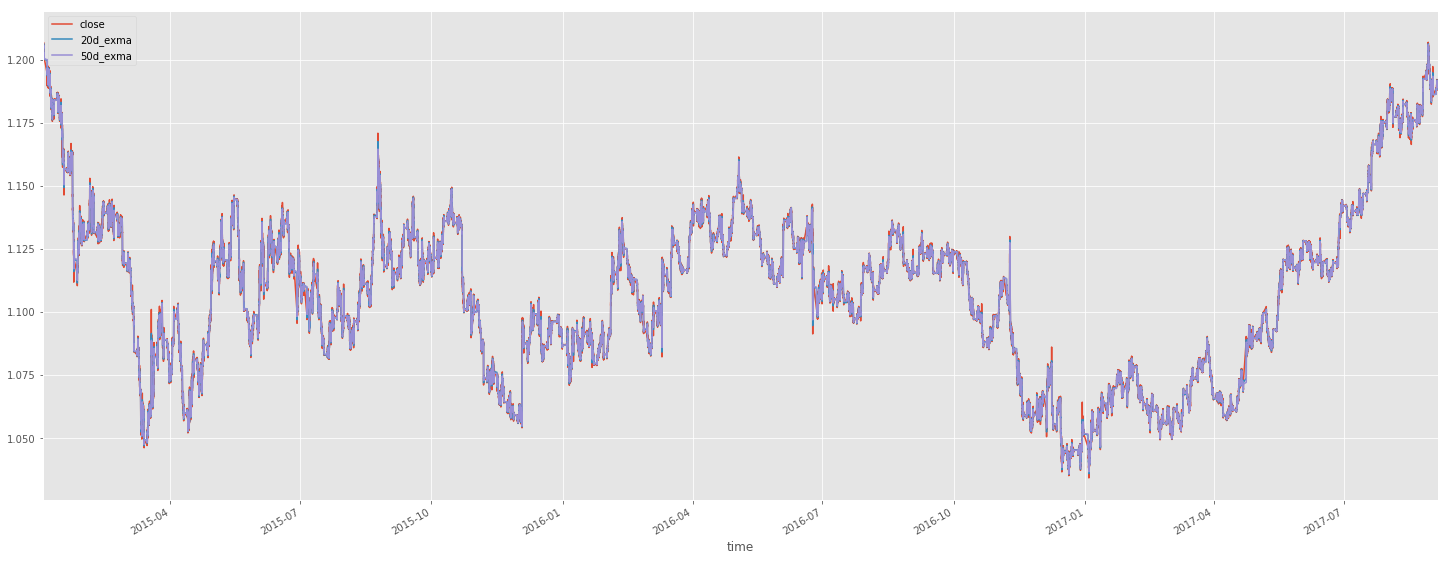

In [424]:
df[datetime(2015,1,1):].plot(y=['close', '20d_exma','50d_exma'], figsize=(25,10))

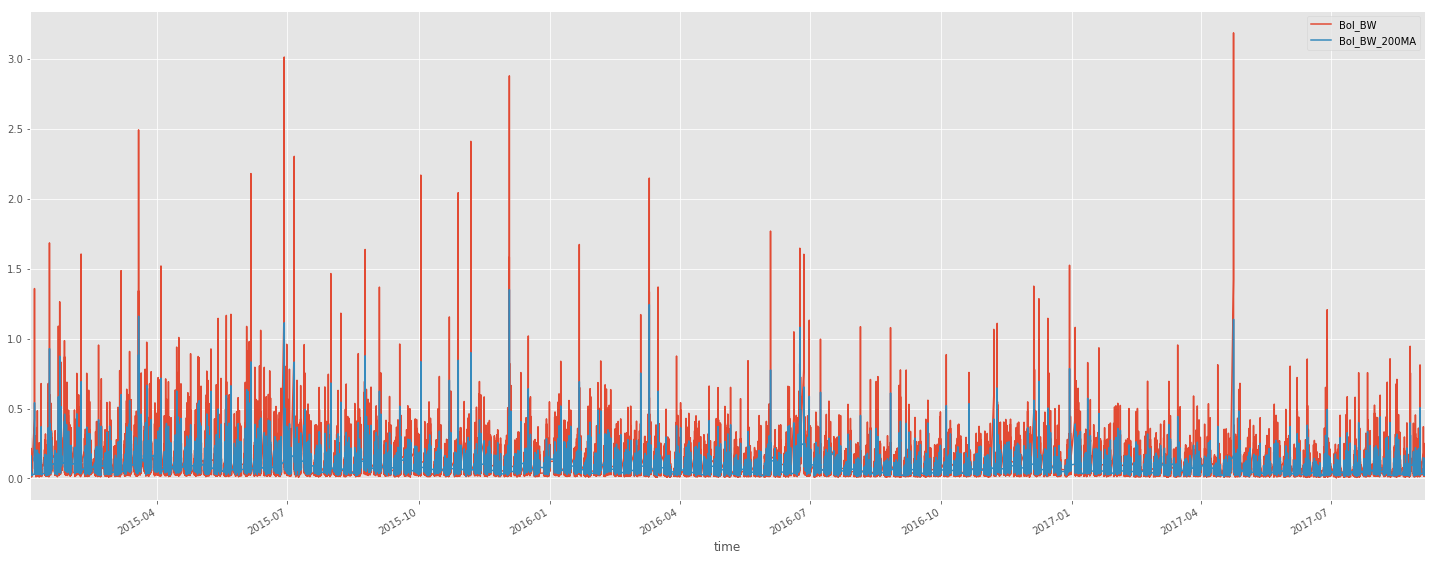

In [425]:
df[datetime(2015,1,1):].plot(y=['Bol_BW','Bol_BW_200MA'], figsize=(25,10))

# Add Features TA-Lib

In [426]:
print(talib.get_function_groups().keys())

dict_keys(['Cycle Indicators', 'Math Operators', 'Math Transform', 'Momentum Indicators', 'Overlap Studies', 'Pattern Recognition', 'Price Transform', 'Statistic Functions', 'Volatility Indicators', 'Volume Indicators'])


In [427]:
print(talib.get_functions())

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

In [428]:
talib.abstract.__all__

['Function',
 'HT_DCPERIOD',
 'NATR',
 'MIDPOINT',
 'WILLR',
 'AVGPRICE',
 'ROCR',
 'CDLSTICKSANDWICH',
 'MIDPRICE',
 'STOCHRSI',
 'PPO',
 'SAR',
 'BBANDS',
 'LN',
 'MOM',
 'EMA',
 'CDLMATCHINGLOW',
 'CDLTAKURI',
 'CDLLADDERBOTTOM',
 'SQRT',
 'CDLKICKING',
 'MAMA',
 'CDLHANGINGMAN',
 'EXP',
 'LINEARREG_SLOPE',
 'ROC',
 'CDL3BLACKCROWS',
 'OBV',
 'CDLSTALLEDPATTERN',
 'MACDEXT',
 'TANH',
 'CDLKICKINGBYLENGTH',
 'CDLBELTHOLD',
 'BETA',
 'KAMA',
 'HT_TRENDLINE',
 'LOG10',
 'CDLMORNINGDOJISTAR',
 'COS',
 'CDLLONGLEGGEDDOJI',
 'TSF',
 'AROON',
 'HT_DCPHASE',
 'CDLMARUBOZU',
 'CDLCLOSINGMARUBOZU',
 'MA',
 'CDLHAMMER',
 'CDLSHOOTINGSTAR',
 'MAXINDEX',
 'CDLBREAKAWAY',
 'CDLENGULFING',
 'CDLHARAMI',
 'CDLUPSIDEGAP2CROWS',
 'SINH',
 'APO',
 'SUM',
 'CDL3OUTSIDE',
 'CDLGRAVESTONEDOJI',
 'MINMAXINDEX',
 'ADXR',
 'MFI',
 'CDL3INSIDE',
 'CDLDARKCLOUDCOVER',
 'ROCR100',
 'TRIMA',
 'CDLDOJI',
 'SAREXT',
 'SIN',
 'CDLINNECK',
 'VAR',
 'MULT',
 'STDDEV',
 'FLOOR',
 'CDLMATHOLD',
 'AROONOSC',
 'CDLABAND

In [429]:
ohlcv = {
    'open': df['open'].values,
    'high': df['high'].values,
    'low': df['low'].values,
    'close': df['close'].values,
    'volume': df['volume'].values.astype(float)
}

In [430]:
talib_abstract_fun_list = talib.abstract.__all__[1:]
talib_abstract_fun_list.remove('MAVP')
print(len(talib_abstract_fun_list))
print(talib.abstract.MAVP.info)

157
{'name': 'MAVP', 'group': 'Overlap Studies', 'display_name': 'Moving average with variable period', 'function_flags': ['Output scale same as input'], 'input_names': OrderedDict([('price', 'close'), ('periods', 2.0)]), 'parameters': OrderedDict([('minperiod', 2), ('maxperiod', 30), ('matype', 0)]), 'output_flags': OrderedDict([('real', ['Line'])]), 'output_names': ['real']}


In [ ]:
fun_result_dict = {}
for fun in talib_abstract_fun_list:
    fun_result_dict[fun] = getattr(talib.abstract, fun)(ohlcv)

In [405]:
for per in range(2, 32, 2):
    col_name = 'MAVP_'+str(per)
    df[col_name] = talib.MAVP(df['close'].values, periods=np.array([float(per)]*df.shape[0]))

In [406]:
MAVP_cols.append('close')
df[MAVP_cols].dropna()

,MAVP_2,MAVP_4,MAVP_6,MAVP_8,MAVP_10,MAVP_12,MAVP_14,MAVP_16,MAVP_18,MAVP_20,MAVP_22,MAVP_24,MAVP_26,MAVP_28,MAVP_30,open,open,open,close,close
time,,,,,,,,,,,,,,,,,,,,
2005-02-02 22:00:00,1.300100,1.302160,1.302590,1.303407,1.303076,1.303213,1.302776,1.302614,1.303280,1.304637,1.305861,1.305936,1.306353,1.307831,1.310700,1.30280,1.30280,1.30280,1.29750,1.29750
2005-02-03 22:00:00,1.292200,1.297920,1.299790,1.300877,1.301164,1.301813,1.302097,1.301678,1.301969,1.302852,1.304780,1.305132,1.305183,1.306363,1.308422,1.29740,1.29740,1.29740,1.28690,1.28690
2005-02-04 22:00:00,1.280950,1.290525,1.295090,1.297180,1.298916,1.299388,1.300033,1.300048,1.300207,1.301047,1.302484,1.303785,1.304014,1.304539,1.306039,1.28680,1.28680,1.28680,1.27500,1.27500
2005-02-05 22:00:00,1.280500,1.286350,1.292113,1.294967,1.296802,1.297720,1.298769,1.299398,1.299324,1.299822,1.300820,1.302757,1.303237,1.303420,1.304639,1.28705,1.28705,1.28705,1.28600,1.28600
2005-02-06 22:00:00,1.280870,1.280910,1.287307,1.291535,1.293918,1.295908,1.296743,1.297638,1.297917,1.298273,1.299213,1.300682,1.302022,1.302361,1.302961,1.28610,1.28610,1.28610,1.27574,1.27574
2005-02-07 22:00:00,1.275970,1.278235,1.282890,1.288077,1.291168,1.293330,1.294613,1.295919,1.296794,1.296989,1.297654,1.298749,1.300696,1.301289,1.301590,1.27574,1.27574,1.27574,1.27620,1.27620
2005-02-08 22:00:00,1.278390,1.279630,1.280070,1.285077,1.288906,1.291330,1.293406,1.294449,1.295499,1.295964,1.296465,1.297478,1.298968,1.300334,1.300763,1.27620,1.27620,1.27620,1.28058,1.28058
2005-02-09 22:00:00,1.284040,1.280005,1.280170,1.283177,1.287270,1.289980,1.292003,1.293291,1.294599,1.295519,1.295812,1.296519,1.297618,1.299506,1.300139,1.28048,1.28048,1.28048,1.28750,1.28750
2005-02-10 22:00:00,1.287050,1.282720,1.282103,1.281815,1.285472,1.288597,1.290719,1.292611,1.293627,1.294654,1.295154,1.295681,1.296675,1.298116,1.299449,1.28750,1.28750,1.28750,1.28660,1.28660


In [407]:
np.mean([1.29740, 1.28680])

1.2921

In [408]:
for key, value in fun_result_dict.items():
    if len(value) < 3000:
        print(key, len(value))

STOCHRSI 2
BBANDS 3
MAMA 2
MACDEXT 3
AROON 2
MINMAXINDEX 2
STOCHF 2
STOCH 2
HT_SINE 2
MINMAX 2
MACD 3
MACDFIX 3
HT_PHASOR 2


In [409]:
for key, value in fun_result_dict.items():
    if len(value) > 5:
        df[key] = value
    else:
        for i, val in enumerate(value):
            df[key+'_'+str(i+1)] = val

In [410]:
list(df.columns)

['volume',
 'close',
 'high',
 'low',
 'open',
 'complete',
 'log_returns_1',
 'ari_returns_1',
 'target_label_direction_1',
 'log_returns_3',
 'ari_returns_3',
 'target_label_direction_3',
 '20d_ma',
 '50d_ma',
 'Bol_upper',
 'Bol_lower',
 'Bol_BW',
 'Bol_BW_200MA',
 '20d_exma',
 '50d_exma',
 'MAVP_2',
 'MAVP_4',
 'MAVP_6',
 'MAVP_8',
 'MAVP_10',
 'MAVP_12',
 'MAVP_14',
 'MAVP_16',
 'MAVP_18',
 'MAVP_20',
 'MAVP_22',
 'MAVP_24',
 'MAVP_26',
 'MAVP_28',
 'MAVP_30',
 'HT_DCPERIOD',
 'NATR',
 'MIDPOINT',
 'WILLR',
 'AVGPRICE',
 'ROCR',
 'CDLSTICKSANDWICH',
 'MIDPRICE',
 'STOCHRSI_1',
 'STOCHRSI_2',
 'PPO',
 'SAR',
 'BBANDS_1',
 'BBANDS_2',
 'BBANDS_3',
 'LN',
 'MOM',
 'EMA',
 'CDLMATCHINGLOW',
 'CDLTAKURI',
 'CDLLADDERBOTTOM',
 'SQRT',
 'CDLKICKING',
 'MAMA_1',
 'MAMA_2',
 'CDLHANGINGMAN',
 'EXP',
 'LINEARREG_SLOPE',
 'ROC',
 'CDL3BLACKCROWS',
 'OBV',
 'CDLSTALLEDPATTERN',
 'MACDEXT_1',
 'MACDEXT_2',
 'MACDEXT_3',
 'TANH',
 'CDLKICKINGBYLENGTH',
 'CDLBELTHOLD',
 'BETA',
 'KAMA',
 'HT_TRE

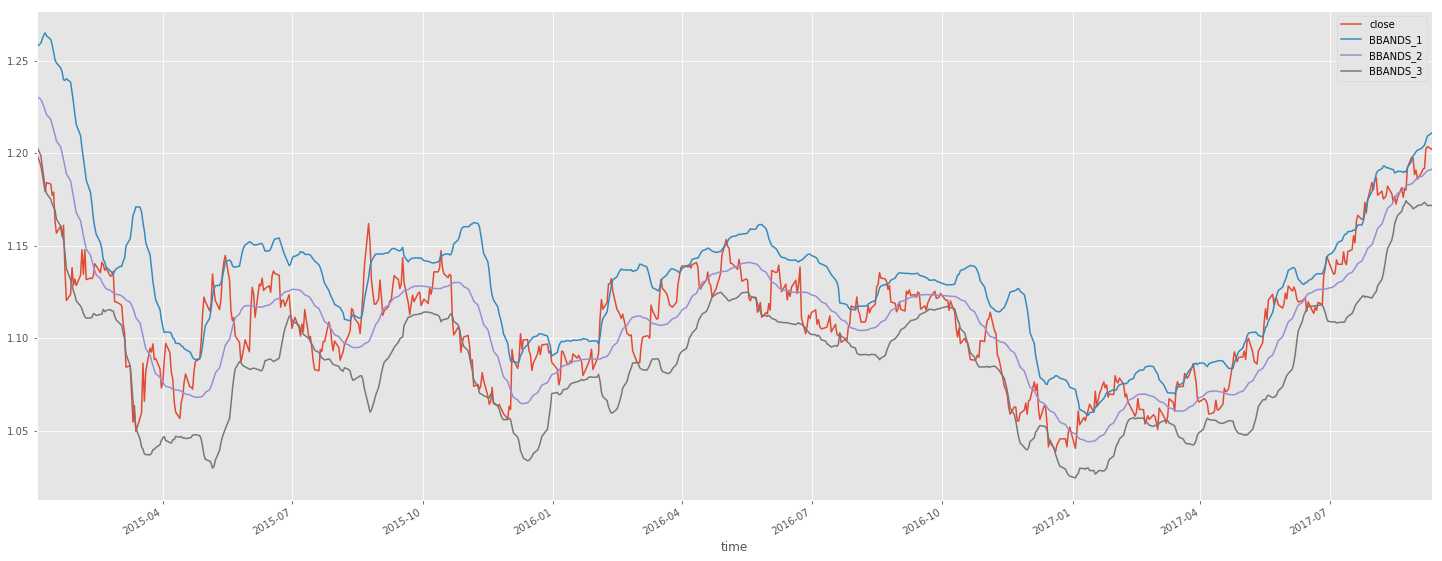

In [411]:
df[datetime(2015,1,1):].plot(y=['close', 'BBANDS_1', 'BBANDS_2', 'BBANDS_3'], figsize=(25,10))

In [412]:
for col in df.columns:
    if df[col].isnull().all():
        print(col)
        df.drop(col, axis=1, inplace=True)

ASIN
ACOS


In [352]:
df.shape[0] - df.dropna().shape[0]

117

In [353]:
df.head()

,volume,close,high,low,open,complete,log_returns_1,ari_returns_1,target_label_direction_1,log_returns_3,ari_returns_3,target_label_direction_3,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma,MAVP_2,MAVP_4,MAVP_6,MAVP_8,MAVP_10,MAVP_12,MAVP_14,MAVP_16,MAVP_18,MAVP_20,MAVP_22,MAVP_24,MAVP_26,MAVP_28,MAVP_30,HT_DCPERIOD,NATR,MIDPOINT,WILLR,AVGPRICE,ROCR,CDLSTICKSANDWICH,MIDPRICE,STOCHRSI_1,STOCHRSI_2,PPO,SAR,BBANDS_1,BBANDS_2,BBANDS_3,LN,MOM,EMA,CDLMATCHINGLOW,CDLTAKURI,CDLLADDERBOTTOM,SQRT,CDLKICKING,MAMA_1,MAMA_2,CDLHANGINGMAN,EXP,LINEARREG_SLOPE,ROC,CDL3BLACKCROWS,OBV,CDLSTALLEDPATTERN,MACDEXT_1,MACDEXT_2,MACDEXT_3,TANH,CDLKICKINGBYLENGTH,CDLBELTHOLD,BETA,KAMA,HT_TRENDLINE,LOG10,CDLMORNINGDOJISTAR,COS,CDLLONGLEGGEDDOJI,TSF,AROON_1,AROON_2,HT_DCPHASE,CDLMARUBOZU,CDLCLOSINGMARUBOZU,MA,CDLHAMMER,CDLSHOOTINGSTAR,MAXINDEX,CDLBREAKAWAY,CDLENGULFING,CDLHARAMI,CDLUPSIDEGAP2CROWS,SINH,APO,SUM,CDL3OUTSIDE,CDLGRAVESTONEDOJI,MINMAXINDEX_1,MINMAXINDEX_2,ADXR,MFI,CDL3INSIDE,CDLDARKCLOUDCOVER,ROCR100,TRIMA,CDLDOJI,SAREXT,SIN,CDLINNECK,VAR,MULT,STDDEV,FLOOR,CDLMATHOLD,AROONOSC,CDLABANDONEDBABY,PLUS_DM,CDLEVENINGDOJISTAR,CDLPIERCING,CDLCOUNTERATTACK,T3,CDLHIKKAKE,LINEARREG_INTERCEPT,DEMA,AD,CDLSPINNINGTOP,CDL3LINESTRIKE,BOP,PLUS_DI,LINEARREG,MAX,CDLRICKSHAWMAN,STOCHF_1,STOCHF_2,CDLEVENINGSTAR,CMO,TRIX,STOCH_1,STOCH_2,WCLPRICE,HT_SINE_1,HT_SINE_2,MEDPRICE,LINEARREG_ANGLE,CDLLONGLINE,ROCP,RSI,SMA,CDLGAPSIDESIDEWHITE,CDL3WHITESOLDIERS,ATR,DIV,CDLTASUKIGAP,CDLMORNINGSTAR,ADX,MINMAX_1,MINMAX_2,DX,SUB,CORREL,TEMA,CCI,TYPPRICE,WMA,COSH,TAN,MACD_1,MACD_2,MACD_3,CEIL,CDLHOMINGPIGEON,CDLINVERTEDHAMMER,MINUS_DM,CDLIDENTICAL3CROWS,CDLSHORTLINE,CDLADVANCEBLOCK,CDLHARAMICROSS,TRANGE,CDLRISEFALL3METHODS,CDLHIKKAKEMOD,CDLSEPARATINGLINES,ADD,CDL2CROWS,ADOSC,MACDFIX_1,MACDFIX_2,MACDFIX_3,HT_TRENDMODE,CDLDRAGONFLYDOJI,CDLUNIQUE3RIVER,CDLTRISTAR,CDLHIGHWAVE,ATAN,CDLTHRUSTING,MININDEX,CDLXSIDEGAP3METHODS,HT_PHASOR_1,HT_PHASOR_2,CDLONNECK,MINUS_DI,CDLCONCEALBABYSWALL,CDL3STARSINSOUTH,ULTOSC,MIN,CDLDOJISTAR
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 22:00:00,303,1.35525,1.35700,1.35410,1.35600,True,-0.006477,-0.006456,0,-0.021759,-0.021524,0,NaN,NaN,NaN,NaN,NaN,NaN,1.355250,1.355250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355587,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303986,NaN,NaN,0,0,0,1.164152,0,NaN,NaN,0,3.877730,NaN,NaN,0,303.0,0,NaN,NaN,NaN,0.875287,0,0,NaN,NaN,NaN,0.132019,0,0.213881,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,1.809924,NaN,NaN,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,NaN,0.976860,0,NaN,1.837514,NaN,1.0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,-62.689655,0,0,-0.258621,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.355400,NaN,NaN,1.35555,NaN,0,NaN,NaN,NaN,0,0,NaN,1.002142,0,0,NaN,NaN,NaN,NaN,0.00290,NaN,NaN,NaN,1.355450,NaN,2.067807,4.567302,NaN,NaN,NaN,2.0,0,0,NaN,0,0,0,0,NaN,0,0,0,2.71110,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.935103,0,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,0
2005-01-02 22:00:00,38042,1.34650,1.35815,1.33855,1.35535,True,-0.013835,-0.013739,0,-0.021909,-0.021671,0,NaN,NaN,NaN,NaN,NaN,NaN,1.350656,1.350787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349638,NaN,0,NaN,NaN,NaN,NaN,1.338550,NaN,NaN,NaN,0.297509,NaN,NaN,0,0,0,1.160388,0,NaN,NaN,0,3.843948,NaN,NaN,0,-37739.0,0,NaN,NaN,NaN,0.873225,0,0,NaN,NaN,NaN,0.129206,0,0.222420,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,1.791899,NaN,NaN,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,1.338550,0.974951,0,NaN,1.817952,NaN,1.0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,-7244.087614,0,0,-0.451531,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.347425,NaN,NaN,1.34835,NaN,0,NaN,NaN,NaN,0,0,NaN,1.014643,0,0,NaN,NaN,NaN,NaN,0.01960,NaN,NaN,NaN,1.347733,NaN,2.052049,4.383370,NaN,NaN,NaN,2.0,0,0,NaN,0,0,0,0,0.01960,0,0,0,2.69670,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.932005,0,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,0


abc

0 1

1 2
 
2 3

3 4

4 nan






In [354]:
df['high'][1]

1.35815

In [355]:
df['close'][0]

1.3552500000000001

In [356]:
df['high'][1] - df['close'][0]

0.0028999999999999027

In [357]:
df['low'][1] - df['close'][0]

-0.016700000000000159

In [358]:
drop_columns = ['volume', 'close', 'high', 'low', 'open', 'complete', 'log_returns_1', 'ari_returns_1', 'log_returns_3', 'ari_returns_3', 'target_label_direction_3']
df.drop(drop_columns, axis=1, inplace=True)

In [359]:
df.head()

,target_label_direction_1,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma,MAVP_2,MAVP_4,MAVP_6,MAVP_8,MAVP_10,MAVP_12,MAVP_14,MAVP_16,MAVP_18,MAVP_20,MAVP_22,MAVP_24,MAVP_26,MAVP_28,MAVP_30,HT_DCPERIOD,NATR,MIDPOINT,WILLR,AVGPRICE,ROCR,CDLSTICKSANDWICH,MIDPRICE,STOCHRSI_1,STOCHRSI_2,PPO,SAR,BBANDS_1,BBANDS_2,BBANDS_3,LN,MOM,EMA,CDLMATCHINGLOW,CDLTAKURI,CDLLADDERBOTTOM,SQRT,CDLKICKING,MAMA_1,MAMA_2,CDLHANGINGMAN,EXP,LINEARREG_SLOPE,ROC,CDL3BLACKCROWS,OBV,CDLSTALLEDPATTERN,MACDEXT_1,MACDEXT_2,MACDEXT_3,TANH,CDLKICKINGBYLENGTH,CDLBELTHOLD,BETA,KAMA,HT_TRENDLINE,LOG10,CDLMORNINGDOJISTAR,COS,CDLLONGLEGGEDDOJI,TSF,AROON_1,AROON_2,HT_DCPHASE,CDLMARUBOZU,CDLCLOSINGMARUBOZU,MA,CDLHAMMER,CDLSHOOTINGSTAR,MAXINDEX,CDLBREAKAWAY,CDLENGULFING,CDLHARAMI,CDLUPSIDEGAP2CROWS,SINH,APO,SUM,CDL3OUTSIDE,CDLGRAVESTONEDOJI,MINMAXINDEX_1,MINMAXINDEX_2,ADXR,MFI,CDL3INSIDE,CDLDARKCLOUDCOVER,ROCR100,TRIMA,CDLDOJI,SAREXT,SIN,CDLINNECK,VAR,MULT,STDDEV,FLOOR,CDLMATHOLD,AROONOSC,CDLABANDONEDBABY,PLUS_DM,CDLEVENINGDOJISTAR,CDLPIERCING,CDLCOUNTERATTACK,T3,CDLHIKKAKE,LINEARREG_INTERCEPT,DEMA,AD,CDLSPINNINGTOP,CDL3LINESTRIKE,BOP,PLUS_DI,LINEARREG,MAX,CDLRICKSHAWMAN,STOCHF_1,STOCHF_2,CDLEVENINGSTAR,CMO,TRIX,STOCH_1,STOCH_2,WCLPRICE,HT_SINE_1,HT_SINE_2,MEDPRICE,LINEARREG_ANGLE,CDLLONGLINE,ROCP,RSI,SMA,CDLGAPSIDESIDEWHITE,CDL3WHITESOLDIERS,ATR,DIV,CDLTASUKIGAP,CDLMORNINGSTAR,ADX,MINMAX_1,MINMAX_2,DX,SUB,CORREL,TEMA,CCI,TYPPRICE,WMA,COSH,TAN,MACD_1,MACD_2,MACD_3,CEIL,CDLHOMINGPIGEON,CDLINVERTEDHAMMER,MINUS_DM,CDLIDENTICAL3CROWS,CDLSHORTLINE,CDLADVANCEBLOCK,CDLHARAMICROSS,TRANGE,CDLRISEFALL3METHODS,CDLHIKKAKEMOD,CDLSEPARATINGLINES,ADD,CDL2CROWS,ADOSC,MACDFIX_1,MACDFIX_2,MACDFIX_3,HT_TRENDMODE,CDLDRAGONFLYDOJI,CDLUNIQUE3RIVER,CDLTRISTAR,CDLHIGHWAVE,ATAN,CDLTHRUSTING,MININDEX,CDLXSIDEGAP3METHODS,HT_PHASOR_1,HT_PHASOR_2,CDLONNECK,MINUS_DI,CDLCONCEALBABYSWALL,CDL3STARSINSOUTH,ULTOSC,MIN,CDLDOJISTAR
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 22:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,1.355250,1.355250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355587,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303986,NaN,NaN,0,0,0,1.164152,0,NaN,NaN,0,3.877730,NaN,NaN,0,303.0,0,NaN,NaN,NaN,0.875287,0,0,NaN,NaN,NaN,0.132019,0,0.213881,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,1.809924,NaN,NaN,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,NaN,0.976860,0,NaN,1.837514,NaN,1.0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,-62.689655,0,0,-0.258621,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.355400,NaN,NaN,1.35555,NaN,0,NaN,NaN,NaN,0,0,NaN,1.002142,0,0,NaN,NaN,NaN,NaN,0.00290,NaN,NaN,NaN,1.355450,NaN,2.067807,4.567302,NaN,NaN,NaN,2.0,0,0,NaN,0,0,0,0,NaN,0,0,0,2.71110,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.935103,0,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,0
2005-01-02 22:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,1.350656,1.350787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349638,NaN,0,NaN,NaN,NaN,NaN,1.338550,NaN,NaN,NaN,0.297509,NaN,NaN,0,0,0,1.160388,0,NaN,NaN,0,3.843948,NaN,NaN,0,-37739.0,0,NaN,NaN,NaN,0.873225,0,0,NaN,NaN,NaN,0.129206,0,0.222420,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,1.791899,NaN,NaN,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,1.338550,0.974951,0,NaN,1.817952,NaN,1.0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,-7244.087614,0,0,-0.451531,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.347425,NaN,NaN,1.34835,NaN,0,NaN,NaN,NaN,0,0,NaN,1.014643,0,0,NaN,NaN,NaN,NaN,0.01960,NaN,NaN,NaN,1.347733,NaN,2.052049,4.383370,NaN,NaN,NaN,2.0,0,0,NaN,0,0,0,0,0.01960,0,0,0,2.69670,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.932005,0,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,0
2005-01-03 22:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,1.342337,1.342886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.337245,NaN,0,NaN,NaN,NaN,NaN,1.358150,NaN,NaN,NaN,0.283674,NaN,NaN,0,0,0,1.152389,0,NaN,NaN,0,3.773489,NaN,NaN,0,-79904.0,0,NaN,NaN,NaN,0.868760,0,0,NaN,N

In [360]:
df.dropna(inplace=True)

In [361]:
df.head()

,target_label_direction_1,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma,MAVP_2,MAVP_4,MAVP_6,MAVP_8,MAVP_10,MAVP_12,MAVP_14,MAVP_16,MAVP_18,MAVP_20,MAVP_22,MAVP_24,MAVP_26,MAVP_28,MAVP_30,HT_DCPERIOD,NATR,MIDPOINT,WILLR,AVGPRICE,ROCR,CDLSTICKSANDWICH,MIDPRICE,STOCHRSI_1,STOCHRSI_2,PPO,SAR,BBANDS_1,BBANDS_2,BBANDS_3,LN,MOM,EMA,CDLMATCHINGLOW,CDLTAKURI,CDLLADDERBOTTOM,SQRT,CDLKICKING,MAMA_1,MAMA_2,CDLHANGINGMAN,EXP,LINEARREG_SLOPE,ROC,CDL3BLACKCROWS,OBV,CDLSTALLEDPATTERN,MACDEXT_1,MACDEXT_2,MACDEXT_3,TANH,CDLKICKINGBYLENGTH,CDLBELTHOLD,BETA,KAMA,HT_TRENDLINE,LOG10,CDLMORNINGDOJISTAR,COS,CDLLONGLEGGEDDOJI,TSF,AROON_1,AROON_2,HT_DCPHASE,CDLMARUBOZU,CDLCLOSINGMARUBOZU,MA,CDLHAMMER,CDLSHOOTINGSTAR,MAXINDEX,CDLBREAKAWAY,CDLENGULFING,CDLHARAMI,CDLUPSIDEGAP2CROWS,SINH,APO,SUM,CDL3OUTSIDE,CDLGRAVESTONEDOJI,MINMAXINDEX_1,MINMAXINDEX_2,ADXR,MFI,CDL3INSIDE,CDLDARKCLOUDCOVER,ROCR100,TRIMA,CDLDOJI,SAREXT,SIN,CDLINNECK,VAR,MULT,STDDEV,FLOOR,CDLMATHOLD,AROONOSC,CDLABANDONEDBABY,PLUS_DM,CDLEVENINGDOJISTAR,CDLPIERCING,CDLCOUNTERATTACK,T3,CDLHIKKAKE,LINEARREG_INTERCEPT,DEMA,AD,CDLSPINNINGTOP,CDL3LINESTRIKE,BOP,PLUS_DI,LINEARREG,MAX,CDLRICKSHAWMAN,STOCHF_1,STOCHF_2,CDLEVENINGSTAR,CMO,TRIX,STOCH_1,STOCH_2,WCLPRICE,HT_SINE_1,HT_SINE_2,MEDPRICE,LINEARREG_ANGLE,CDLLONGLINE,ROCP,RSI,SMA,CDLGAPSIDESIDEWHITE,CDL3WHITESOLDIERS,ATR,DIV,CDLTASUKIGAP,CDLMORNINGSTAR,ADX,MINMAX_1,MINMAX_2,DX,SUB,CORREL,TEMA,CCI,TYPPRICE,WMA,COSH,TAN,MACD_1,MACD_2,MACD_3,CEIL,CDLHOMINGPIGEON,CDLINVERTEDHAMMER,MINUS_DM,CDLIDENTICAL3CROWS,CDLSHORTLINE,CDLADVANCEBLOCK,CDLHARAMICROSS,TRANGE,CDLRISEFALL3METHODS,CDLHIKKAKEMOD,CDLSEPARATINGLINES,ADD,CDL2CROWS,ADOSC,MACDFIX_1,MACDFIX_2,MACDFIX_3,HT_TRENDMODE,CDLDRAGONFLYDOJI,CDLUNIQUE3RIVER,CDLTRISTAR,CDLHIGHWAVE,ATAN,CDLTHRUSTING,MININDEX,CDLXSIDEGAP3METHODS,HT_PHASOR_1,HT_PHASOR_2,CDLONNECK,MINUS_DI,CDLCONCEALBABYSWALL,CDL3STARSINSOUTH,ULTOSC,MIN,CDLDOJISTAR
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-05-05 21:00:00,1,1.296289,1.300569,1.313293,1.279285,2.623520,3.505541,1.293507,1.298612,1.288800,1.289850,1.288667,1.288563,1.290010,1.292271,1.294296,1.295847,1.296796,1.296289,1.295379,1.295326,1.295168,1.294760,1.294244,22.430655,0.658670,1.294200,-97.173145,1.288795,0.985546,0,1.295250,0.000000,66.666667,-0.223696,1.298920,1.308968,1.292394,1.275821,0.248343,-0.01880,1.295514,0,0,0,1.132210,0,1.292914,1.297365,0,3.603480,-0.001587,-1.445376,0,-424495.0,0,-0.002897,0.002499,-0.005397,0.856990,0,-100,1.544944,1.302057,1.295589,0.107854,0,0.284894,0,1.282396,100.000000,0.000000,309.779335,0,0,1.294244,0,0,99,0,-100,0,0,1.662985,-0.002897,38.82733,0,0,94,99,22.606392,28.774627,0,0,98.554624,1.297345,0,-1.298920,0.958559,0,0.000027,1.660792,0.005226,1.0,0,-100.000000,0,0.023047,0,0,0,1.288264,0,1.304610,1.290007,-177214.321817,0,100,-0.909686,19.497822,1.283983,1.3086,0,4.489338,53.806767,-100,-25.079280,-0.023471,61.123417,41.300505,1.28532,-0.768514,-0.090992,1.28874,-0.090911,-100,-0.014454,37.460360,1.295617,0,0,0.008443,1.011927,0,0,18.467659,1.28118,1.3086,14.817883,0.01528,0.799171,1.288944,-86.988153,1.286460,1.294340,1.940495,3.364610,-0.003151,-0.002370,-0.000781,2.0,0,0,0.031065,0,0,0,0,0.01528,0,0,0,2.57748,0,-11448.808929,-0.002985,-0.002248,-0.000737,0,0,0,0,0,0.908313,0,94,0,-0.010914,0.014341,0,26.281322,0,0,38.736957,1.28118,0
2005-05-06 21:00:00,0,1.295774,1.299285,1.313887,1.277661,2.795761,3.496653,1.292402,1.297951,1.281900,1.288525,1.287950,1.287638,1.288350,1.290225,1.292539,1.294178,1.295657,1.295774,1.294948,1.294683,1.294730,1.294628,1.294076,21.543117,0.611623,1.294175,-96.998124,1.281900,0.987216,0,1.294425,0.000000,33.333333,-0.347919,1.298920,1.309839,1.292184,1.274529,0.248343,-0.01660,1.294635,0,0,0,1.132210,0,1.292363,1.297240,0,3.603480,-0.001539,-1.278398,0,-424495.0,0,-0.004505,0.001328,-0.005833,0.856990,0,0,0.16607

In [362]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [363]:
sv = make_pipeline(StandardScaler(), SVC())
lr = make_pipeline(StandardScaler(), LogisticRegression())
dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200))
ad = make_pipeline(StandardScaler(), AdaBoostClassifier(n_estimators=200))
gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=200))
models = [sv, lr, dt, rf, ad, gb]

In [364]:
y = df['target_label_direction_1']
x = df.drop('target_label_direction_1', axis=1)

In [365]:
(1 - (sum(df['target_label_direction_1'] == 1) / len(df['target_label_direction_1']))) * 100

48.143339392365611

In [366]:
for mod in models:
    print(mod.steps[1][1].__class__.__name__)
    print(np.mean(cross_val_score(mod, x, y, cv=3, n_jobs=-1)))

SVC
0.501162255196
LogisticRegression
0.487145587032
DecisionTreeClassifier
0.489743462112
RandomForestClassifier
0.507654413616
AdaBoostClassifier
0.502200676795
GradientBoostingClassifier
0.49571216054


In [367]:
split_index = int(df.shape[0] * .7)

In [368]:
x_train, x_test = x.iloc[:split_index], x.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

In [369]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(2695, 195) (1156, 195)
(2695,) (1156,)


In [377]:
y_test = pd.Series(y_test.values)

In [370]:
for mod in models:
    mod.fit(x_train, y_train)

In [378]:
for mod in models:
    print(mod.steps[1][1].__class__.__name__)
    print('----------------------------')
    print('accuracy', mod.score(x_test, y_test))
    print('----------------------------')
    y_pred = mod.predict(x_test)
    y_pred = pd.Series(y_pred, name='pred')
    print('recall', recall_score(y_test, y_pred))
    print('----------------------------')
    print('precision', precision_score(y_test, y_pred))
    print('----------------------------')
    print(pd.crosstab(y_test, y_pred))
    print('----------------------------')
    print(classification_report(y_test, y_pred))
    print('----------------------------')

SVC
----------------------------
accuracy 0.501730103806
----------------------------
recall 0.822608695652
----------------------------
precision 0.499472016895
----------------------------
pred     0    1
row_0          
0      107  474
1      102  473
----------------------------
             precision    recall  f1-score   support

          0       0.51      0.18      0.27       581
          1       0.50      0.82      0.62       575

avg / total       0.51      0.50      0.45      1156

----------------------------
LogisticRegression
----------------------------
accuracy 0.502595155709
----------------------------
recall 0.63652173913
----------------------------
precision 0.5
----------------------------
pred     0    1
row_0          
0      215  366
1      209  366
----------------------------
             precision    recall  f1-score   support

          0       0.51      0.37      0.43       581
          1       0.50      0.64      0.56       575

avg / total       0.50  

LogisticRegression 0.49223377984
DecisionTreeClassifier 0.489605627479
RandomForestClassifier 0.543195390257
AdaBoostClassifier 0.507375589314
GradientBoostingClassifier 0.533452069146


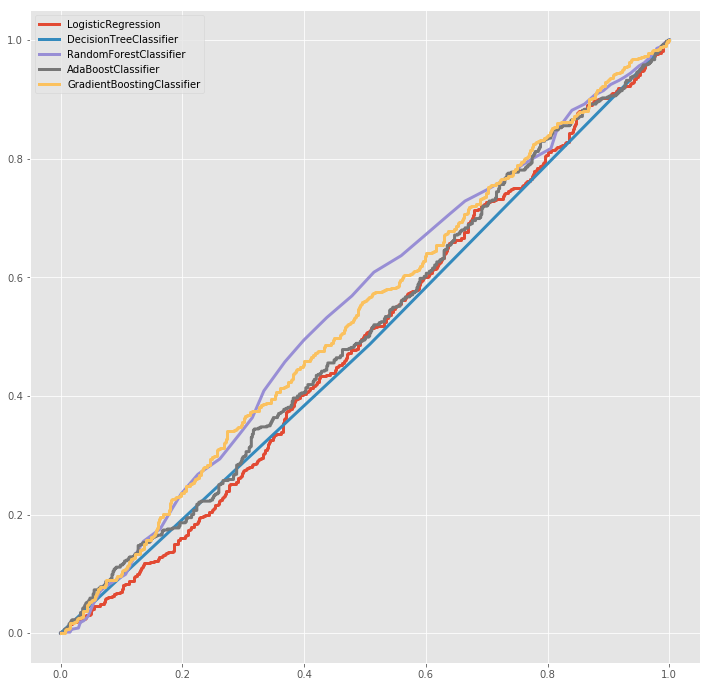

In [372]:
for classer in models[1:]:
    probas = classer.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print(classer.steps[1][1].__class__.__name__, roc_auc)
    plt.plot(fpr, tpr, lw=3, label=classer.steps[1][1].__class__.__name__)
plt.legend(loc='best')

In [379]:
for classer in models[2:]:
    feat_impor = classer.steps[1][1].feature_importances_
    x_feat = pd.DataFrame({'cols': x.columns, 'feat_impo': feat_impor})
    print(classer.steps[1][1].__class__.__name__, '\n', x_feat.sort_values(by='feat_impo', ascending=False))

DecisionTreeClassifier 
                     cols  feat_impo
187          HT_PHASOR_2   0.061502
127              STOCH_1   0.033397
117                  BOP   0.032867
61                  BETA   0.026438
89                  ADXR   0.025743
122             STOCHF_1   0.025460
162             MINUS_DM   0.025009
4                 Bol_BW   0.023852
186          HT_PHASOR_1   0.022506
32            STOCHRSI_2   0.022028
128              STOCH_2   0.020505
130            HT_SINE_1   0.020336
118              PLUS_DI   0.020230
114                   AD   0.019753
173                ADOSC   0.019660
53                   OBV   0.018955
144                  ADX   0.018945
126                 TRIX   0.018585
147                   DX   0.017886
149               CORREL   0.017419
99                   VAR   0.017166
33                   PPO   0.016617
192               ULTOSC   0.016576
189             MINUS_DI   0.016083
123             STOCHF_2   0.014728
141                  DIV   0.014156
131

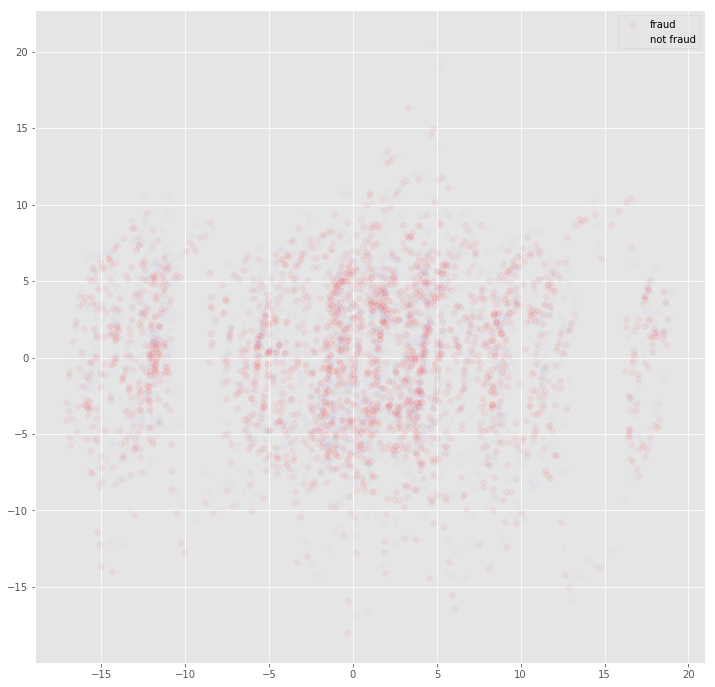

In [380]:
from sklearn.decomposition import PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
x_new = pca.fit_transform(x)
fig, ax = plt.subplots()
x_new_one = x_new[y==1]
x_new_zero = x_new[y==0]
ax.scatter(x_new_one[:,0], x_new_one[:,1], c='red', label='fraud', alpha=.05)
ax.scatter(x_new_zero[:,0], x_new_zero[:,1], c='blue', label='not fraud', alpha=.01)
plt.legend(loc='best')

In [21]:
cols = []
for momentum in [15, 30, 60, 120]:
    col = 'average_log_return_sign_{}'.format(momentum)
    df[col] = np.sign(df['log_returns'].rolling(momentum).mean()).shift(1) #the sign of the average returns of the last x candles
    cols.append(col)

In [22]:
df.head(20)

,volume,close,high,low,open,complete,actual_up_down,log_returns,ari_returns,target_future_1_direction,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma,upper,middle,lower,average_log_return_sign_15,average_log_return_sign_30,average_log_return_sign_60,average_log_return_sign_120
time,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 22:00:00,303,1.35525,1.35700,1.35410,1.35600,True,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.356000,1.356000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-02 22:00:00,38042,1.34650,1.35815,1.33855,1.35535,True,-1.0,-0.000479,-0.000479,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.355659,1.355668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03 22:00:00,42165,1.32800,1.34960,1.32488,1.34650,True,-1.0,-0.006551,-0.006530,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.352296,1.352489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04 22:00:00,40233,1.32608,1.33028,1.32152,1.32790,True,-1.0,-0.013910,-0.013814,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.345253,1.345968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05 22:00:00,38037,1.31732,1.32826,1.31562,1.32608,True,-1.0,-0.001372,-0.001371,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.340615,1.341666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06 22:00:00,37339,1.30540,1.32508,1.30248,1.31722,True,-1.0,-0.006704,-0.006681,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.335680,1.337174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-08 22:00:00,185,1.30620,1.30630,1.30490,1.30520,True,-1.0,-0.009167,-0.009125,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.329917,1.332040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-09 22:00:00,34912,1.30732,1.31238,1.30520,1.30600,True,1.0,0.000613,0.000613,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.325783,1.328312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-10 22:00:00,36616,1.31068,1.31718,1.30672,1.30742,True,1.0,0.001087,0.001087,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.322837,1.325602,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
strats = ['log_returns']
for col in cols:
    strat = 'strategy_{}'.format(col)
    df[strat] = df[col] * df['log_returns'] #shift last sign one and multiply by return
    strats.append(strat)

In [24]:
strats

['log_returns',
 'strategy_average_log_return_sign_15',
 'strategy_average_log_return_sign_30',
 'strategy_average_log_return_sign_60',
 'strategy_average_log_return_sign_120']

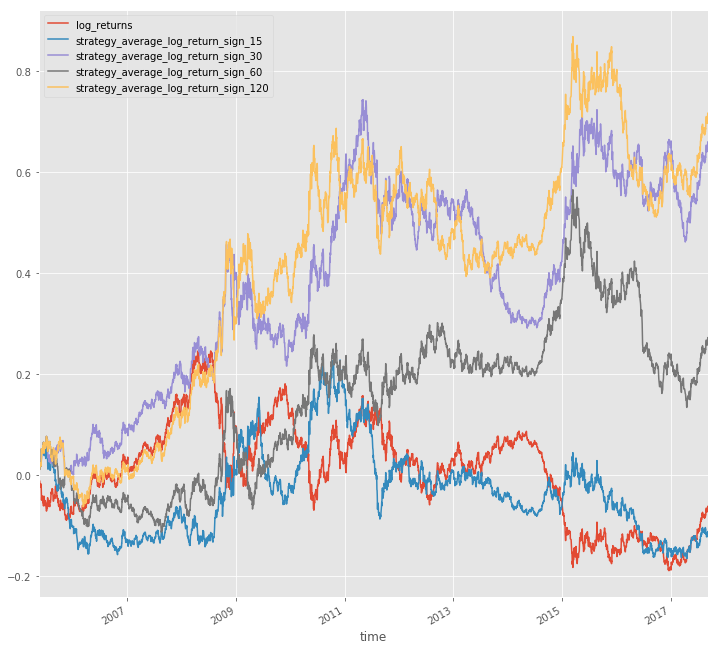

In [25]:
fig, axes = plt.subplots()
cum_returns = df[strats].dropna().cumsum().apply(np.exp)-1 #you can add log returns and then transpose back with np.exp
cum_returns.plot(ax=axes)
plt.legend(loc='best')